Acurácia do modelo: 1.00


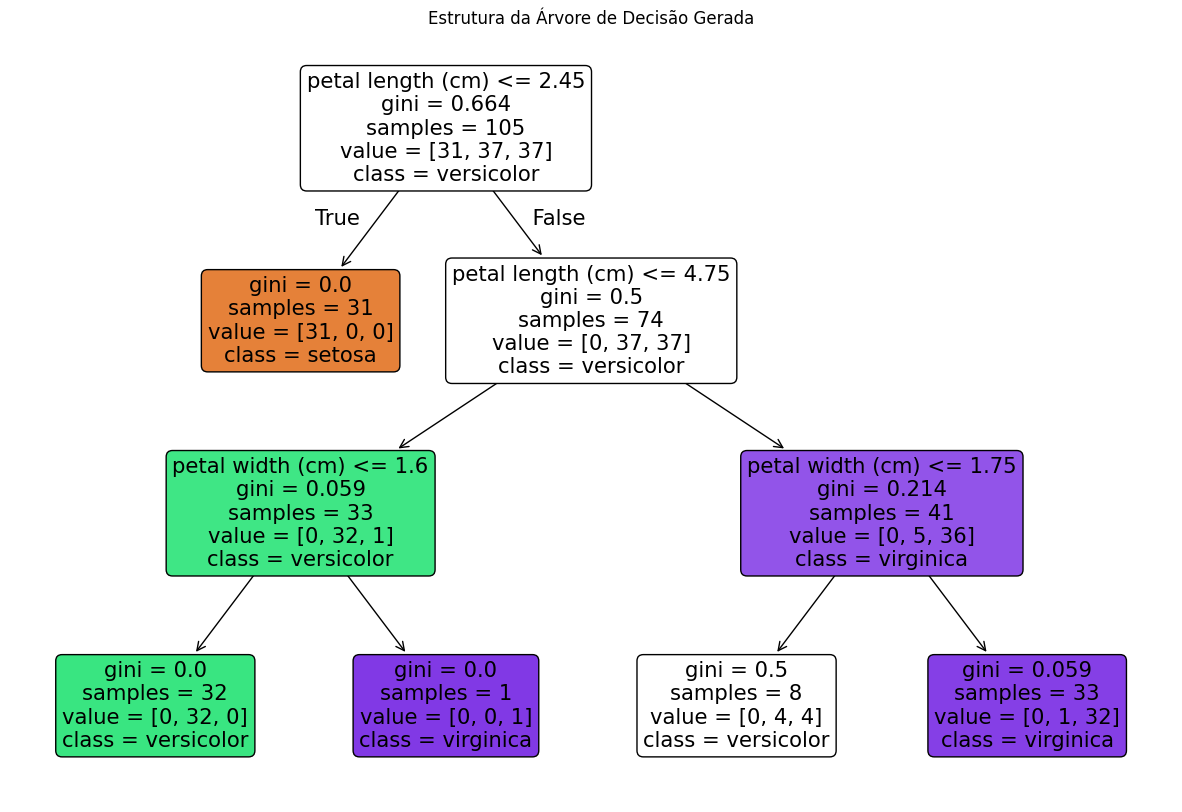

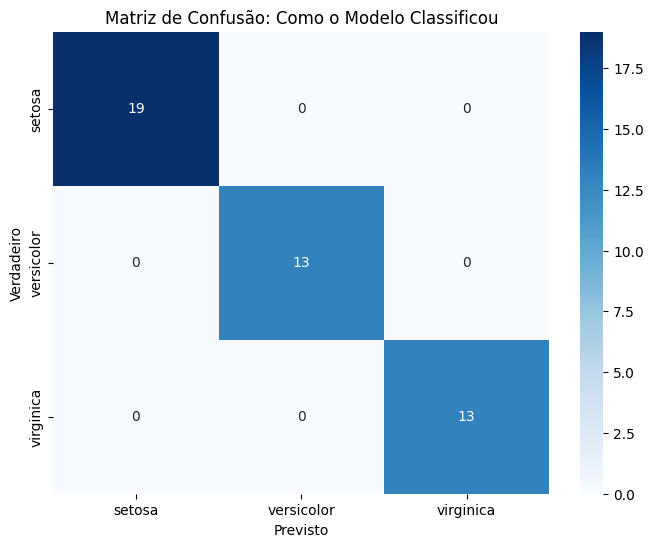

In [4]:
# Importando as ferramentas mágicas! #
from sklearn.datasets import load_iris # Importa a função `load_iris` do módulo `sklearn.datasets`. `load_iris` é usada para carregar o conjunto de dados Iris, um dataset clássico em machine learning.
from sklearn.tree import DecisionTreeClassifier, plot_tree # Importa a classe `DecisionTreeClassifier` e a função `plot_tree` do módulo `sklearn.tree`. `DecisionTreeClassifier` é o algoritmo para criar o modelo de árvore de decisão, e `plot_tree` é usada para visualizar a árvore.
from sklearn.model_selection import train_test_split # Importa a função `train_test_split` do módulo `sklearn.model_selection`. Esta função é usada para dividir o conjunto de dados em subconjuntos de treino e teste.
from sklearn.metrics import accuracy_score, confusion_matrix # Importa as funções `accuracy_score` e `confusion_matrix` do módulo `sklearn.metrics`. `accuracy_score` calcula a acurácia do modelo, e `confusion_matrix` calcula a matriz de confusão para avaliar a performance da classificação.
import matplotlib.pyplot as plt # Importa o módulo `pyplot` da biblioteca `matplotlib` e o apelida como `plt`. Matplotlib é uma biblioteca para criar visualizações estáticas, animadas e interativas em Python.
import seaborn as sns # Importa a biblioteca `seaborn` e a apelida como `sns`. Seaborn é uma biblioteca de visualização de dados baseada no matplotlib, que fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.
import numpy as np # Importa a biblioteca `numpy` e a apelida como `np`. NumPy é fundamental para computação científica em Python, oferecendo suporte a arrays e matrizes multidimensionais, juntamente com uma grande coleção de funções matemáticas de alto nível para operar nesses arrays.

# 1. Carregando os Dados (O famoso dataset Iris)
iris = load_iris() # Chama a função `load_iris()` para carregar o conjunto de dados Iris. O resultado (um objeto que contém os dados e metadados) é armazenado na variável `iris`.
X, y = iris.data, iris.target # Extrai os dados das características (features) e os rótulos (classes/targets) do objeto `iris`. `iris.data` contém as medições das flores (comprimento e largura da sépala e pétala) e é atribuído a `X`. `iris.target` contém as espécies das flores (os rótulos que queremos prever) e é atribuído a `y`.
feature_names = iris.feature_names # Armazena os nomes das características (ex: 'sepal length (cm)') na variável `feature_names`. Isso é útil para interpretar a árvore de decisão.
target_names = iris.target_names # Armazena os nomes das classes/espécies (ex: 'setosa', 'versicolor', 'virginica') na variável `target_names`. Isso também é útil para a visualização.

# 2. Dividindo os Dados: Uma parte para treinar, outra para testar, 70% treino, 30% teste!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Divide os dados `X` (características) e `y` (rótulos) em conjuntos de treino e teste.
# `X_train`: características para treinar o modelo.
# `X_test`: características para testar o modelo (dados que o modelo não viu durante o treino).
# `y_train`: rótulos correspondentes ao `X_train`.
# `y_test`: rótulos correspondentes ao `X_test`, usados para avaliar o modelo.
# `test_size=0.3`: especifica que 30% dos dados serão usados para o conjunto de teste (e 70% para treino).
# `random_state=42`: garante que a divisão seja a mesma toda vez que o código for executado. O número 42 é uma semente arbitrária; qualquer número inteiro produziria o mesmo efeito de reprodutibilidade.

# 3. Construindo e Treinando nossa Árvore!
modelo = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42) # Cria uma instância do classificador de Árvore de Decisão e a armazena na variável `modelo`.
# `criterion='gini'`: especifica o critério usado para medir a qualidade de uma divisão. 'gini' refere-se ao Índice Gini. Outra opção comum é 'entropy' (para ganho de informação).
# `max_depth=3`: define a profundidade máxima da árvore. Isso ajuda a prevenir o overfitting (quando o modelo se ajusta demais aos dados de treino e não generaliza bem para novos dados).
# `random_state=42`: usado para reprodutibilidade na construção da árvore, caso haja aleatoriedade no algoritmo (ex: ao selecionar features se `max_features` for menor que o total).
modelo.fit(X_train, y_train) # Treina o modelo de árvore de decisão usando os dados de treino (`X_train` e `y_train`). O método `fit` ajusta o modelo aos dados.

# 4. Fazendo Previsões e Avaliando o Desempenho # Comentário de seção: este bloco usa o modelo treinado para fazer previsões e avalia sua performance.
y_pred = modelo.predict(X_test) # Usa o modelo treinado (`modelo`) para fazer previsões sobre os dados de teste (`X_test`). As previsões são armazenadas em `y_pred`.
acuracia = accuracy_score(y_test, y_pred) # Calcula a acurácia do modelo comparando os rótulos verdadeiros do conjunto de teste (`y_test`) com os rótulos previstos (`y_pred`). A acurácia é a proporção de previsões corretas.
print(f"Acurácia do modelo: {acuracia:.2f}") # Imprime a acurácia calculada, formatada para exibir duas casas decimais. O `f` antes da string indica uma f-string, que permite embutir expressões dentro de strings.


# 5. VISUALIZAÇÃO 1: A Estrutura da Árvore de Decisão # Comentário de seção: este bloco visualiza a árvore de decisão.

plt.figure(figsize=(15, 10)) # Cria uma nova figura para o gráfico com um tamanho especificado de 15x10 polegadas. `plt.figure()` é uma função do matplotlib.
plot_tree(modelo, filled=True, feature_names=feature_names, class_names=target_names, rounded=True) # Desenha a árvore de decisão.
# `modelo`: o modelo de árvore de decisão treinado.
# `filled=True`: preenche os nós da árvore com cores para indicar a classe majoritária.
# `feature_names=feature_names`: usa os nomes das características nos nós da árvore.
# `class_names=target_names`: usa os nomes das classes nas folhas da árvore.
# `rounded=True`: desenha os nós com cantos arredondados.
plt.title("Estrutura da Árvore de Decisão Gerada") # Define o título do gráfico.
plt.show() # Exibe o gráfico. Em um script executado localmente, isso geralmente abre uma nova janela com a visualização.

# 6. VISUALIZAÇÃO 2: O Mapa da Classificação! (Novo Gráfico!) # Comentário de seção: este bloco visualiza a matriz de confusão.

cm = confusion_matrix(y_test, y_pred) # Calcula a matriz de confusão usando os rótulos verdadeiros (`y_test`) e os previstos (`y_pred`). A matriz de confusão mostra quantos exemplos de cada classe foram classificados corretamente ou incorretamente.
plt.figure(figsize=(8, 6)) # Cria uma nova figura para o gráfico da matriz de confusão, com tamanho 8x6 polegadas.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names) # Cria um mapa de calor (heatmap) para visualizar a matriz de confusão usando a biblioteca seaborn.
# `cm`: a matriz de confusão calculada.
# `annot=True`: exibe os valores numéricos dentro de cada célula do heatmap.
# `fmt='d'`: formata os números exibidos como inteiros decimais.
# `cmap='Blues'`: define o esquema de cores do mapa de calor (tons de azul).
# `xticklabels=target_names`: define os rótulos para o eixo x (classes previstas) usando os nomes das classes.
# `yticklabels=target_names`: define os rótulos para o eixo y (classes verdadeiras) usando os nomes das classes.
plt.xlabel('Previsto') # Define o rótulo do eixo x.
plt.ylabel('Verdadeiro') # Define o rótulo do eixo y.
plt.title('Matriz de Confusão: Como o Modelo Classificou') # Define o título do gráfico.
plt.show() # Exibe o gráfico da matriz de confusão. Similar ao `plt.show()` anterior, em um script local abriria uma janela.

